# Scattering length density of the simulation
**(MD2reflect version 0.12)**

In [1]:
# Run this cell if this notebook is in a subfolder of the module
import sys
sys.path.append("../../")

In [2]:
from md2reflect import *

## Calculation by element contributions

### Load the trajectory file

In [3]:
traj=load_trajectory("../../simulations/traj3_3frames.pdb")

<mdtraj.Trajectory with 3 frames, 29764 atoms, 3028 residues, and unitcells>
[0 1 2]
Loading time: 0:00:01.474828 (hh:mm:ss)


### Define binning

In [4]:
zbin_interval, box_zlength, zbins_number, zbin_volume = select_zbinning(traj, 
                                                                        zbin_interval=0.5, 
                                                                        zbins_number=None)

Length of simulation box in x direction:  49.85000133514404 Å
Length of simulation box in y direction:  49.85000133514404 Å
Length of simulation box in z direction:  160.0 Å 

Thickness of z slices:  0.5 Å
Number of z bins:  320
Volume of z bins:  1242.51127243042 Å^3


(If a "zbins_number" value is specified, it takes precedence over the "zbin_interval".)

### Count number of atoms and number density of each element

In [5]:
number_atoms_elements_allframes = count_number_atoms(traj, zbins_number)
number_density_elements_allframes = calculate_number_density_elements(number_atoms_elements_allframes, 
                                                                      zbin_volume)

0:00:00.144823 (hh:mm:ss.ss) for one frame. 
There are 2 frames left. 
Estimated running time: 0:00:00.434469 (hh:mm:ss.ss)

Actual running time: 0:00:00.466045 (hh:mm:ss.ss)



### Obtain the x-ray scattering lengths for each element in the simulation

In [6]:
bc_table_xrays = obtain_elements_b_xrays(traj)
bc_table_xrays

{'hydrogen': ('H', 2.8178952023553694, -3.1769218821552078e-06),
 'carbon': ('C', 16.96228410618459, -0.0274194449304488),
 'nitrogen': ('N', 19.81820207007492, -0.05242049632206424),
 'copper': ('Cu', 76.27551703901572, -1.7315382747620958),
 'bromine': ('Br', 96.75473595783109, -3.782638552092838)}

### Calculate the x-ray scattering length contribution for each element in the simulation + plot + save

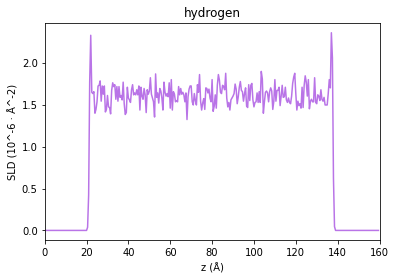

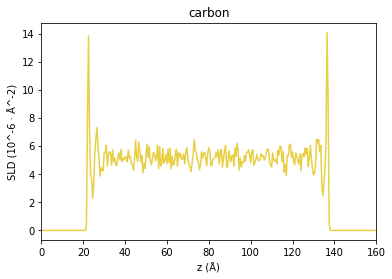

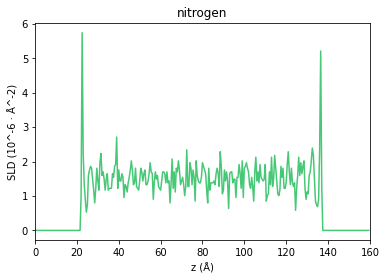

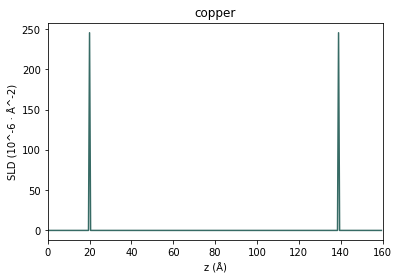

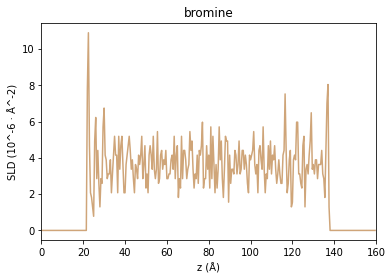

In [7]:
SLD_elements = calculate_SLD_elements(number_density_elements_allframes, bc_table_xrays)
save_SLD_elements(SLD_elements, zbin_interval, show=True)

### Calculate the simulation total scattering length density and without the substrate contribution + plot + save

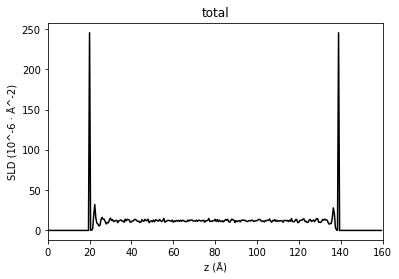

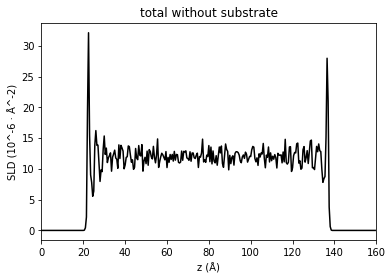

In [8]:
substrate_element = "copper"
SLD_total, SLD_total_no_substrate = calculate_SLD_total(SLD_elements, substrate_element)
save_SLD_total(SLD_total, SLD_total_no_substrate, zbin_interval, filename="SLD_total_elements_zrays")

-----

## Calculation by atom type contributions

### Loading the trajectory file

In [9]:
traj=load_trajectory("../../simulations/traj3_3frames.pdb")

<mdtraj.Trajectory with 3 frames, 29764 atoms, 3028 residues, and unitcells>
[0 1 2]
Loading time: 0:00:01.465022 (hh:mm:ss)


### Define binning

In [10]:
zbin_interval, box_zlength, zbins_number, zbin_volume = select_zbinning(traj, 
                                                                        zbin_interval=0.5)

Length of simulation box in x direction:  49.85000133514404 Å
Length of simulation box in y direction:  49.85000133514404 Å
Length of simulation box in z direction:  160.0 Å 

Thickness of z slices:  0.5 Å
Number of z bins:  320
Volume of z bins:  1242.51127243042 Å^3


### Count number of atoms and number density of each atom type

In [11]:
number_atoms_types_allframes = count_number_atoms_types(traj, zbins_number)
number_density_atom_types_allframes = calculate_number_density_atom_types(number_atoms_types_allframes, 
                                                                          zbin_volume)

0:00:00.148455 (hh:mm:ss.ss) for one frame. 
There are 2 frames left. 
Estimated running time: 0:00:00.445365 (hh:mm:ss.ss)

Actual running time: 0:00:00.542192 (hh:mm:ss.ss)



### Obtain the atom types in the sample and their elements

In [12]:
list_atom_types_elements = find_atom_types_elements(traj) 
list_atom_types_elements

{'CU': {'CU': 'Cu'},
 'CU1': {'CU1': 'Cu'},
 'bmim': {'C1': 'C',
  'C10': 'C',
  'C2': 'C',
  'C3': 'C',
  'C4': 'C',
  'C5': 'C',
  'C6': 'C',
  'C7': 'C',
  'H': 'H',
  'H11': 'H',
  'H12': 'H',
  'H13': 'H',
  'H14': 'H',
  'H15': 'H',
  'H16': 'H',
  'H17': 'H',
  'H18': 'H',
  'H19': 'H',
  'H20': 'H',
  'H21': 'H',
  'H22': 'H',
  'H23': 'H',
  'H24': 'H',
  'N8': 'N',
  'N9': 'N'},
 'BR': {'BR': 'Br'}}

### Obtain the x-ray scattering lengths for each element in the simulation

In [13]:
b_table_atom_type_xrays = obtain_atom_types_b_xrays(list_atom_types_elements)
b_table_atom_type_xrays

{'CU': {'CU': ('Cu', 76.27551703901572, -1.7315382747620958)},
 'CU1': {'CU1': ('Cu', 76.27551703901572, -1.7315382747620958)},
 'bmim': {'C1': ('C', 16.96228410618459, -0.0274194449304488),
  'C10': ('C', 16.96228410618459, -0.0274194449304488),
  'C2': ('C', 16.96228410618459, -0.0274194449304488),
  'C3': ('C', 16.96228410618459, -0.0274194449304488),
  'C4': ('C', 16.96228410618459, -0.0274194449304488),
  'C5': ('C', 16.96228410618459, -0.0274194449304488),
  'C6': ('C', 16.96228410618459, -0.0274194449304488),
  'C7': ('C', 16.96228410618459, -0.0274194449304488),
  'H': ('H', 2.8178952023553694, -3.1769218821552078e-06),
  'H11': ('H', 2.8178952023553694, -3.1769218821552078e-06),
  'H12': ('H', 2.8178952023553694, -3.1769218821552078e-06),
  'H13': ('H', 2.8178952023553694, -3.1769218821552078e-06),
  'H14': ('H', 2.8178952023553694, -3.1769218821552078e-06),
  'H15': ('H', 2.8178952023553694, -3.1769218821552078e-06),
  'H16': ('H', 2.8178952023553694, -3.1769218821552078e-06)

### Calculate the x-ray scattering length contribution for each atom type in the simulation + plot + save

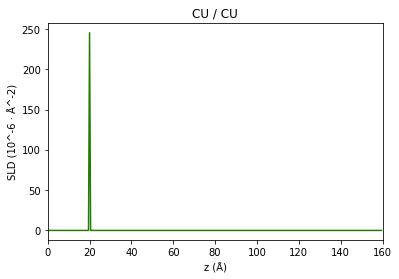

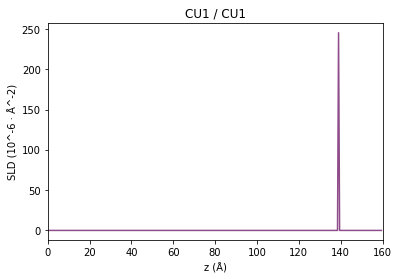

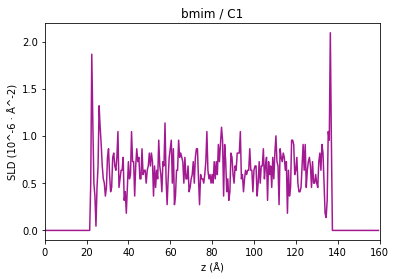

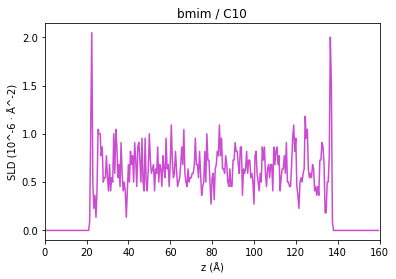

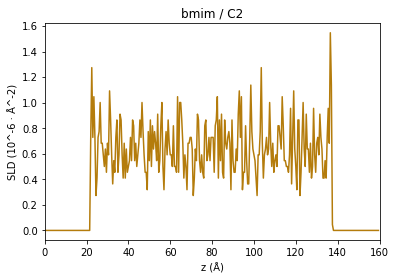

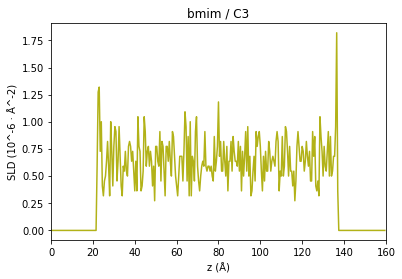

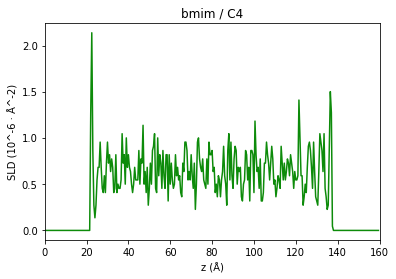

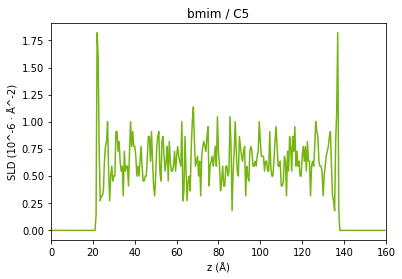

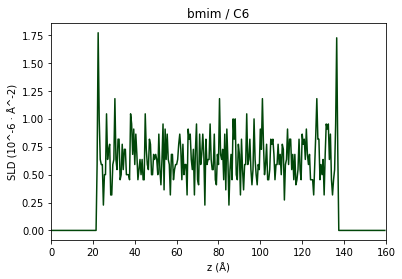

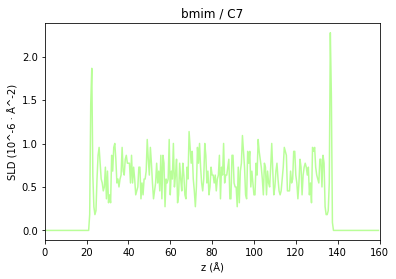

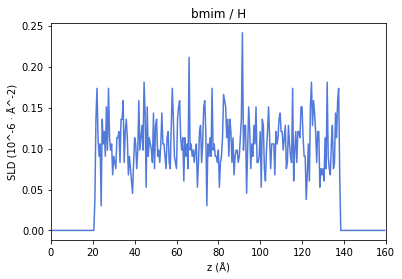

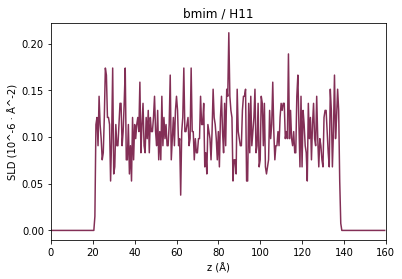

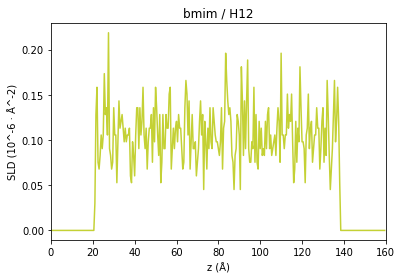

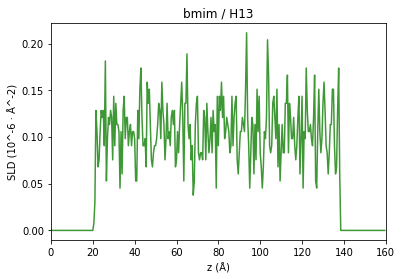

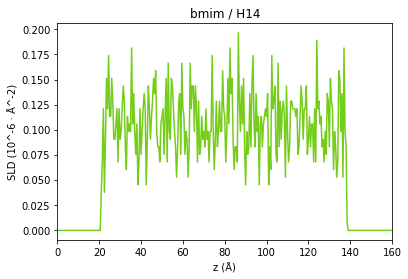

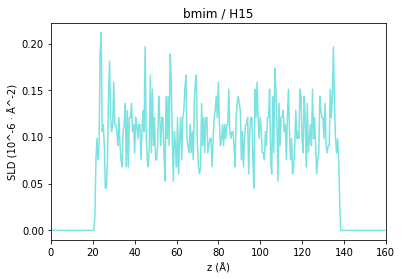

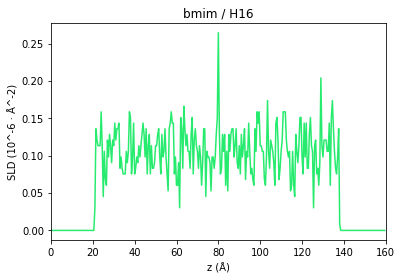

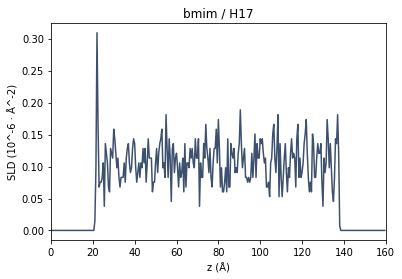

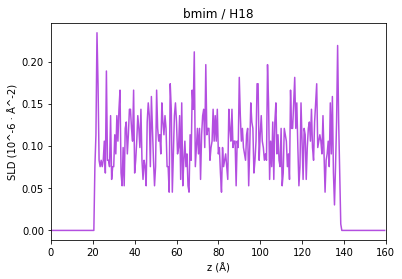

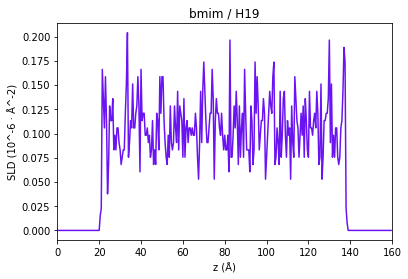

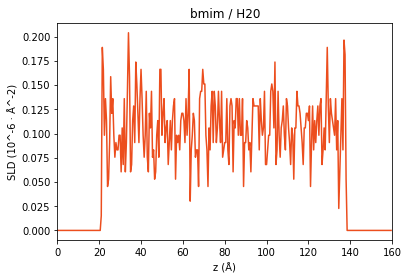

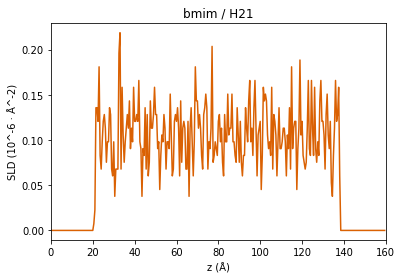

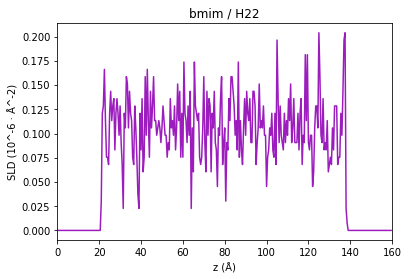

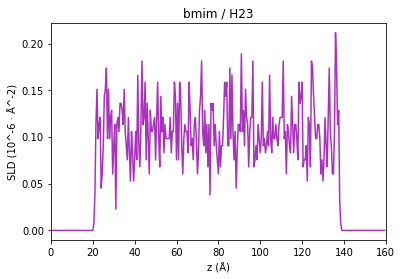

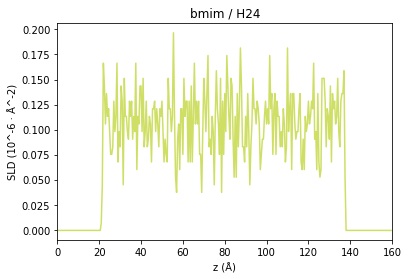

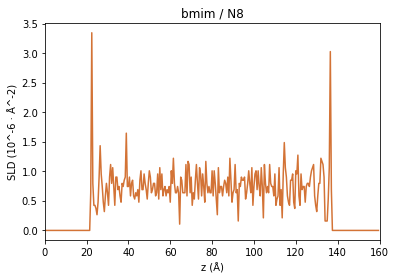

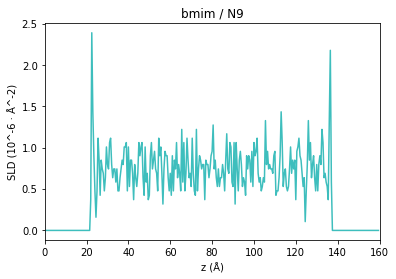

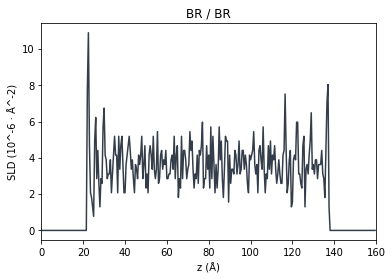

In [14]:
SLD_atom_types = calculate_SLD_atom_types(number_density_atom_types_allframes, b_table_atom_type_xrays)
save_SLD_atom_types(SLD_atom_types, zbin_interval, sufix='_xrays', show=True)

### Calculate the simulation total scattering length density and without the substrate contribution + plot + save

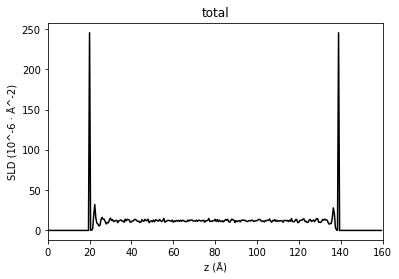

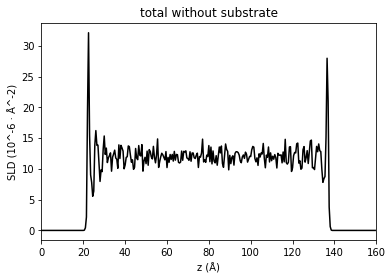

In [15]:
substrate_residues = ["CU", "CU1"]
SLD_total_atom_types, SLD_total_no_substrate_atom_types = calculate_SLD_total_atom_types(SLD_atom_types, 
                                                                                         substrate_residues)
save_SLD_total(SLD_total_atom_types, SLD_total_no_substrate_atom_types, zbin_interval, 
               filename="SLD_total_atom_types_xrays")

As expected, the total scattering length density of the simulation and the total scattering length density without the substrate contribution **yield the same result** regardless off through which contributions was calculated (elements or atom types).